In [130]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [132]:
from __future__ import division
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [133]:
df = pd.read_csv("D:\WEBSITE\german_credit.csv")

## Summmary of the numeric variables

In [134]:
df.columns

Index([u'Creditability', u'Account Balance', u'Duration of Credit (month)',
       u'Payment Status of Previous Credit', u'Purpose', u'Credit Amount',
       u'Value Savings/Stocks', u'Length of current employment',
       u'Instalment per cent', u'Sex & Marital Status', u'Guarantors',
       u'Duration in Current address', u'Most valuable available asset',
       u'Age (years)', u'Concurrent Credits', u'Type of apartment',
       u'No of Credits at this Bank', u'Occupation', u'No of dependents',
       u'Telephone', u'Foreign Worker'],
      dtype='object')

In [135]:
df1 = df[['Duration of Credit (month)','Credit Amount','Age (years)']].copy()
df1.describe()

,Duration of Credit (month),Credit Amount,Age (years)
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


In [136]:
df.columns

Index([u'Creditability', u'Account Balance', u'Duration of Credit (month)',
       u'Payment Status of Previous Credit', u'Purpose', u'Credit Amount',
       u'Value Savings/Stocks', u'Length of current employment',
       u'Instalment per cent', u'Sex & Marital Status', u'Guarantors',
       u'Duration in Current address', u'Most valuable available asset',
       u'Age (years)', u'Concurrent Credits', u'Type of apartment',
       u'No of Credits at this Bank', u'Occupation', u'No of dependents',
       u'Telephone', u'Foreign Worker'],
      dtype='object')

## Segregating response, categorical & numeric variables

In [137]:
target_var = ['Creditability']
cat_var = ['Account Balance', 'Payment Status of Previous Credit', 'Purpose', 'Value Savings/Stocks', 
           'Length of current employment', 'Instalment per cent', 'Sex & Marital Status', 'Guarantors', 
           'Duration in Current address', 'Most valuable available asset', 'Concurrent Credits', 'Type of apartment',
          'No of Credits at this Bank', 'Occupation', 'No of dependents', 'Telephone', 'Foreign Worker']
num_var = ['Duration of Credit (month)', 'Credit Amount', 'Age (years)']

In [138]:
df1 = df.copy()
df1.drop(labels = target_var, axis=1, inplace = True)
df1.columns

Index([u'Account Balance', u'Duration of Credit (month)',
       u'Payment Status of Previous Credit', u'Purpose', u'Credit Amount',
       u'Value Savings/Stocks', u'Length of current employment',
       u'Instalment per cent', u'Sex & Marital Status', u'Guarantors',
       u'Duration in Current address', u'Most valuable available asset',
       u'Age (years)', u'Concurrent Credits', u'Type of apartment',
       u'No of Credits at this Bank', u'Occupation', u'No of dependents',
       u'Telephone', u'Foreign Worker'],
      dtype='object')

## Creating dummy variables for Categorical Independent Variables

In [139]:
df2 = pd.get_dummies(data = df1, columns = cat_var, drop_first = False)

In [140]:
df2.head(5)

,Duration of Credit (month),Credit Amount,Age (years),Account Balance_1,Account Balance_2,Account Balance_3,Account Balance_4,Payment Status of Previous Credit_0,Payment Status of Previous Credit_1,Payment Status of Previous Credit_2,...,Occupation_1,Occupation_2,Occupation_3,Occupation_4,No of dependents_1,No of dependents_2,Telephone_1,Telephone_2,Foreign Worker_1,Foreign Worker_2
0,18,1049,21,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,9,2799,36,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
2,12,841,23,0,1,0,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0
3,12,2122,39,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,12,2171,38,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1


- CREATING X & y to split, train & test

In [141]:
y = df[target_var].values
X= df2.values
y = np.ravel(y)
print "Size of y is {}".format(y.shape)
print "Sample output for y : {}".format(y[:5])
print "Size of X is {}".format(X.shape)
print "Sample output forr X :\n {}".format(X[:5,:])

Size of y is (1000L,)
Sample output for y : [1 1 1 1 1]
Size of X is (1000L, 71L)
Sample output forr X :
 [[  18 1049   21    1    0    0    0    0    0    0    0    1    0    0
     1    0    0    0    0    0    0    0    1    0    0    0    0    0
     1    0    0    0    0    0    0    1    0    1    0    0    1    0
     0    0    0    0    1    0    1    0    0    0    0    1    1    0
     0    1    0    0    0    0    0    1    0    1    0    1    0    1
     0]
 [   9 2799   36    1    0    0    0    0    0    0    0    1    1    0
     0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    1    0    0    0    1    0    0    0    0    1    0    1    0
     0    0    1    0    0    1    0    0    0    0    0    1    1    0
     0    0    1    0    0    0    0    1    0    0    1    1    0    1
     0]
 [  12  841   23    0    1    0    0    0    0    1    0    0    0    0
     0    0    0    0    0    0    1    0    0    1    0    0    0    0
     0    0   

 - Splitting the data into test and train in order to build a model

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 101)

In [143]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(500L, 71L)
(500L,)
(500L, 71L)
(500L,)


## Building a Logistic Regression model

In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
model = LogisticRegression()
model = model.fit(X_train, y_train)

- predicting labels for train data

In [146]:
#predicting class labels for train set
predict_train = model.predict(X_train)
print predict_test[:10]

[1 1 1 1 1 0 1 1 0 1]


In [147]:
# predicting probabilities
probs = model.predict_proba(X_train)
print probs[:5,:]

[[ 0.01079808  0.98920192]
 [ 0.66411547  0.33588453]
 [ 0.06192476  0.93807524]
 [ 0.10670916  0.89329084]
 [ 0.39211537  0.60788463]]


- predicting class labels & scores for test data

In [148]:
#predicting class labels for test set
predict_test = model.predict(X_test)
print predict_test[:10]

[1 1 1 1 1 0 1 1 0 1]


In [149]:
# predicting probabilities
probs = model.predict_proba(X_test)
print probs[:5,:]

[[ 0.22335771  0.77664229]
 [ 0.19559211  0.80440789]
 [ 0.01841315  0.98158685]
 [ 0.24373117  0.75626883]
 [ 0.06601244  0.93398756]]


- Calculating accuracies

In [150]:
from sklearn import metrics

In [151]:
print "Training accuracy is {}".format(metrics.accuracy_score(y_train,predict_train))
print "Test accuracy is {}".format(metrics.accuracy_score(y_test,predict_test))

Training accuracy is 0.808
Test accuracy is 0.768


- Creating a confusion matrix

In [152]:
print metrics.confusion_matrix(y_test, predict_test, labels = [0,1] )

[[ 69  79]
 [ 37 315]]


- Classification report

In [153]:
print metrics.classification_report(y_test, predict_test)

             precision    recall  f1-score   support

          0       0.65      0.47      0.54       148
          1       0.80      0.89      0.84       352

avg / total       0.76      0.77      0.76       500



- Introducing cross validation and calculating scores

In [154]:
from sklearn.cross_validation import cross_val_score

In [155]:
cross_val_score

<function sklearn.cross_validation.cross_val_score>

In [156]:
print "Mean validation accuracy across 10 splits for train data".format(np.mean(cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 10)))

Mean validation accuracy across 10 splits for train data


In [157]:
print np.mean(cross_val_score(model, X, y, scoring = 'accuracy', cv = 10))

0.721


- Receiver operating characteristics for the model

In [158]:
# An ROC plot
from sklearn.metrics import roc_auc_score,r2_score
from sklearn.metrics import roc_curve, auc

In [159]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs[:,1], pos_label= 1 )

In [160]:
print fpr.shape
print tpr.shape
print thresholds.shape

(163L,)
(163L,)
(163L,)


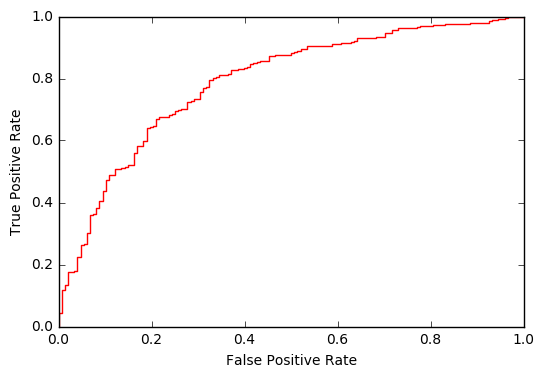

Area under the curve is 0.789715141278


In [128]:
#plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, 'r')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#Calculating Area under the curve
print "Area under the curve is {}".format(metrics.auc(fpr,tpr))